## Kepler's Laws Notebook

### Task 1 - Orbital Periods

For this project, we will take a well known equation and turn it into a function so that we can compute the period of orbit of any planet around any star.

Kepler's Third Law of Planetary Motion allows us to calculate the motion of planets in orbit around a star.

Your task is to take the following equation:

### $T^2 = \frac{4\pi^2 a^3} {GM}$

Where T is the period of rotation, G is the universal gravitational constant, M is the mass of the central object and a is the length of the semi-major axis of the ellipse.

Make sure to leave detailed comments as you work to ensure that the next time you look at your code you can quickly recognise what it does.

Now, in the cell below, design a function that, given $a$ and $M$ as inputs, returns the period of rotation of a planet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generalperiod(a,M):
    yr = (60*60*24*7*52)
    G = 6.674e-11
    Tsqr = (4*np.pi**2*a**3) / (G * M)
    T = np.sqrt(Tsqr)/yr
    return(T)

print('Orbital period for Earth: '+str(generalperiod(1.496E11,1.989E30)))

Orbital period for Earth: 1.0033481166298448


Taking this function, determine the orbital period of a planet at distances between 1 AU and 100 AU for 10 masses of stars between 0.1 and 10 times the mass of the sun (**arange** or **linspace** will help with this).

Ensure that your plots are have both axes labelled.

In [9]:
AU = 1.496e+11
mSun = 1.989e+30
a = np.arange(1,100,1)
# print(a[0])
M = np.linspace(0.1,10,10)
periods = []
for i in M:
    periods.append(np.array(generalperiod(a, i)))
# print(periods[1])

Finally, take the orbital period for each star mass and make a plot of its dependence on distance from the star.

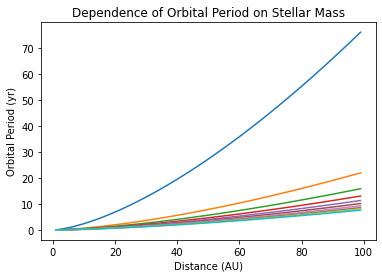

In [10]:
for i in range(len(M)):
    plt.plot(a, periods[i], label='Star mass: %.1f $M_\odot$' %(M[i]/mSun))
    plt.ylabel('Orbital Period (yr)')
    plt.xlabel('Distance (AU)')
    plt.title('Dependence of Orbital Period on Stellar Mass')

### Task 2 - Orbital Velocity

Using the following equation we can calculate the orbital velocity for a given mass and radius. The equation is derived by setting Newton's equation for the gravitational force between two massive bodies equal to the centripetal force equation.

### $\frac{GM}r = \nu^{2}$

Your first task is to create a function that, given $M$ and $r$ as input, returns the orbital velocity.

In [15]:
def orbvel(M,r):
    G = 6.674e-11
    output = []
    for i in M:
        temp = np.sqrt(G*i/r)
        output.append(temp)
    return output

Your next task is to examine how varying stellar mass affects orbital velocity at a given distance. 

Produce a plot that shows the orbital velocities at 1 AU, for 10 masses between 0.1 to 10 solar masses.

Text(0.5,1,'Dependence of Orbital Velocity on Stellar Mass at 1AU')

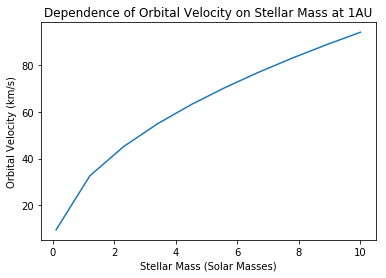

In [6]:
M = mSun*np.linspace(0.1,10,10)
plt.plot(M/mSun,np.array(orbvel(M, AU))/1000)
plt.ylabel('Orbital Velocity (km/s)')
plt.xlabel('Stellar Mass (Solar Masses)')
plt.title('Dependence of Orbital Velocity on Stellar Mass at 1AU')

Your next task is to examine the effect of orbital radius on orbital velocities.

Produce a plot that shows the orbital velocities for a planet at distances between 0.1AU and 100AU, orbiting a star of the same mass as the Sun. 

Text(0.5,1,'Dependence of Orbital Velocity on Orbital Radius')

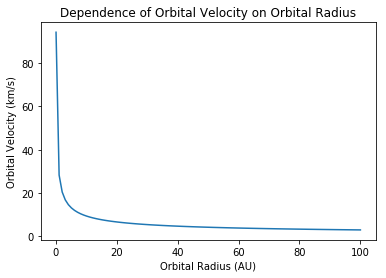

In [7]:
def orbvelr(M,r):
    G = 6.674e-11
    output = []
    for i in r:
        temp = np.sqrt(G*M/i)
        output.append(temp)
    return output

r = AU*np.linspace(0.1,100,100)
plt.plot(r/AU,np.array(orbvelr(mSun, r))/1000)
plt.ylabel('Orbital Velocity (km/s)')
plt.xlabel('Orbital Radius (AU)')
plt.title('Dependence of Orbital Velocity on Orbital Radius')

### Task 3 - Elliptical orbits

Keplar's First Law states that all planets move around the Sun in elliptical orbits, having the Sun (or other star) as one of the foci.

An orbit that appears more stretched out is said to be more *eccentric*. *Eccentricity* is defined as the fraction of the ellipse which separates the focus from the centre, and is denoted by an $e$ in the following equations.


![Keplar Laws Orbital Diagram](http://hyperphysics.phy-astr.gsu.edu/hbase/imgmec/kep.gif "Keplar Laws Orbital Diagram")

Diagram taken from: http://hyperphysics.phy-astr.gsu.edu/hbase/kepler.html#c2

The diagram above shows the geometry of an orbit. The key points to consider are the perihelion radius ($R_{p}$), aphelion radius ($R_{a}$), semi-major axis ($a$) and eccentricity ($e$).

The perihelion is the point at which the orbit brings the object closest to the Sun. 
The aphelion is the point at which the orbit takes the object furthest from the Sun. 
The semi-major axis is the largest radius of the ellipse.

Your first task is to combine the above equations and the equation you created in task 1, allowing you to calculate the time period of an orbit with a specific perihelion/aphelion radius, eccentricity and stellar mass.

In [4]:
def T_period_Ra(Ra,e,M):
    G = 6.674E-11 # Universal Gravitational Constant
    a = (Ra/(1+e)) # Calculate the semi major axis based on aphelion and eccentricity
    T_sqr = ((4*(np.pi**2))*(a**3))/(G*M) # Equation from Kepler's third law
    T = (T_sqr**0.5)/(365.25*24*60*60) # Change time period into years and taking the square root of it
    return(T)

def T_period_Rp(Rp,e,M):
    G = 6.674E-11 # Universal Gravitational Constant
    a = (Rp/(1-e)) # Calculate the semi major axis based on aphelion and eccentricity
    T_sqr = ((4*(np.pi**2))*(a**3))/(G*M) # Equation from Kepler's third law
    T = (T_sqr**0.5)/(365.25*24*60*60) # Change time period into years and taking the square root of it
    return(T)

Using the function you created above, we will examine the effect of eccentricity on orbital period for a star the same mass as the Sun (1 solar mass), at a perihelion radius of 1 AU.

We will examine what the orbital period of the Earth would be if it had the eccentricity of the other planets in the solar system, using the following table:

|Planet|$e$|
|:---:|:---:|
|Mercury| .206|
|Venus| .0068|
|Earth| .0167|
|Mars| .0934|
|Jupiter| .0485|
|Saturn|.0556|
|Uranus| .0472|
|Neptune|.0086|
|Pluto| .25|

Plot these as planets on the x-axis and orbital period on the y-axis

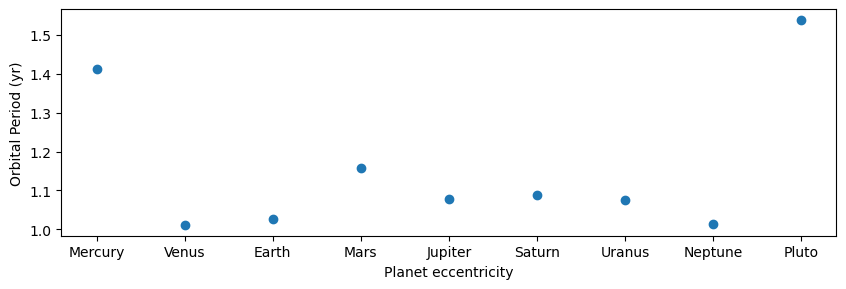

In [5]:
# Change the above table into a list
e_list =  [.206,.0068,.0167,.0934, .0485,.0556, .0472,.0086,.25]
planets = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune','Pluto']

T_ecc = []
for i in e_list:
    perihelion = AU # Set perihelion to 1 AU
    mass = mSun    # Set mass to 1 solar mass
    T_ecc.append(T_period_Rp(perihelion,i,mass))

plt.figure(dpi=100,figsize=(10,3)) # Improve the resolution of the plot
plt.scatter(planets,T_ecc) # Plot the data with the x axis as the planet names
plt.xlabel('Planet eccentricity')
plt.ylabel('Orbital Period (yr)')

plt.show()

### Task 4 - Escape velocity

By equating kinetic energy and gravitational potential energy we can calculate the velocity at which the object will escape the gravitational pull of the object it is orbiting. This is the escape velocity.

### $\frac{1}2 mv^{2} = \frac{GMm}{r}$

### $v_{escape} \geq \sqrt{\frac{2GM}r}$



First, define a function which will calculate the escape velocity of an object, given its radius and the mass of the central object.

In [7]:
def escape_velocity(M,r):
    G = 6.674E-11 # Universal Gravitational Constant
    v = np.sqrt((2*G*M)/r) # Based on equation above, calculate the escape velocity
    return(v)

Next define a function which will compare the orbital velocities and escape velocities of an object. It should print a string which states whether the object will continue to orbit or escape.

In [8]:
def escape_vel_checker(v,M,r,mute = False): # Within this function we include a predefined mute parameter
    if v >= escape_velocity(M,r):           # this allows us to stop the print statements for large inputs
        if not mute:
            print('Escape velocity reached')
        test = True
    else:
        if not mute:
            print('Orbit will continue')
        test = False
    return(test) # Here we output the result of the escape velocity test, for finding the minimum escape velocity

v_list = np.arange(1e3,5e5,1) # Define a list of the velocities, between 1,000 and 500,000 m/s, with steps of 1
esc_v_check_list = []
for i in v_list:
    M = mSun   # Set the mass to solar mass
    radius = AU # Set radius to 1 AU
    esc_v_check_list.append(escape_vel_checker(i,M,radius,mute=True)) 
    
counter = 0 # We use a counter to help with outputting the correct velocity
for i in esc_v_check_list: # Here we loop through the tests to find the minimum escape velocity
    if i:                  # This calculation can be done easily by hand, but this is an example of a 
        print('escape velocity reached at: '+str(v_list[counter])+' m/s') #           True/False test.
        break # The break statement stops the loop early
    counter += 1

escape velocity reached at: 42127.0 m/s
